### using pyroma conda env 

In [1]:
import scanpy as sc
import time
from pyROMA.ROMA import *
import os
print(os.getcwd())
print(ROMA)

# Initialize ROMA
roma = ROMA()
# this should be empty at first
roma.adata



/home/az/Projects/01_Curie/05_pyROMA/pyROMA
<class 'pyROMA.ROMA.ROMA'>


In [2]:
roma

scROMA

In [3]:
import pandas as pd

df = pd.read_csv('datasets/from_R/rheman-cf-ncf-rna-exp-matrix-norm.tsv', sep='\t')
print(df.shape)
df.head()

(19107, 12)


,GSM5356205,GSM5356206,GSM5356207,GSM5356208,GSM5356209,GSM5356210,GSM5356217,GSM5356218,GSM5356219,GSM5356220,GSM5356221,GSM5356222
A2M,-2.276695,-2.276695,-2.276695,-2.276695,-2.276695,-2.276695,-2.276695,-2.276695,-2.276695,0.276775,-2.276695,-2.276695
NAT2,-0.529709,-1.701147,-1.186181,-1.784351,0.015076,-0.821612,-0.985824,-0.070284,-2.276695,0.173414,-0.629473,-0.258930
ACADM,7.426065,7.734505,7.554314,7.304610,7.298017,7.432436,7.630496,7.574262,6.923768,7.805810,7.493325,7.449435
ACADS,5.289551,5.117106,5.228877,5.227824,5.160557,5.624386,4.466059,5.670722,5.132320,5.266203,5.207499,5.516344
ACADVL,-2.276695,4.346211,-2.276695,5.275499,0.354508,6.596574,2.555607,0.866217,3.231686,-1.419318,2.670606,3.046472


In [4]:
sample_labels = pd.read_csv('datasets/from_R/rheman-cf-ncf-rna-exp-matrix-norm-sample_labels.tsv', sep='\t')
print(sample_labels.shape)
sample_labels.head()

(12, 3)


,sample_id,Type,CF_sample_id
1,GSM5356205,non_CF,non_CF 1
2,GSM5356206,non_CF,non_CF 2
3,GSM5356207,non_CF,non_CF 3
4,GSM5356208,non_CF,non_CF 4
5,GSM5356209,non_CF,non_CF 5


In [5]:
sample_labels.tail()

,sample_id,Type,CF_sample_id
8,GSM5356218,CF,CF 2
9,GSM5356219,CF,CF 3
10,GSM5356220,CF,CF 4
11,GSM5356221,CF,CF 5
12,GSM5356222,CF,CF 6


In [6]:
import anndata
adata = anndata.AnnData(df.T)
adata

AnnData object with n_obs × n_vars = 12 × 19107

In [7]:
#adata.obs = sample_labels
#adata.obs

In [8]:
adata.var

""
A2M
NAT2
ACADM
ACADS
ACADVL
...
SLC16A12
C2orf66
SFXN4
KRT39


In [9]:
roma.adata = adata
print(roma.adata)

AnnData object with n_obs × n_vars = 12 × 19107


### optional steps  if data is not normalized or needs further filtering 

In [10]:
# Download and preprocess adata
#adata = sc.read_h5ad('datasets/rna_10xpmbc3k.h5ad')
#sc.pp.filter_cells(adata, min_genes = 200)
#sc.pp.filter_genes(adata, min_cells = 3)

#c.pp.normalize_total(adata, target_sum=1e4)
#sc.pp.log1p(adata)

#sc.pp.highly_variable_genes(adata, n_top_genes=5000)#, flavor='seurat_v3')
#adata = adata[:, adata.var.highly_variable]
#adata = adata[adata.obs['celltype'] == 'B']
#adata.X = adata.X.todense()


In [11]:
# Initialize the pathway file by providing its name
roma.gmt ='h.all.v2023.1.Hs.symbols'

In [12]:
pathways = roma.read_gmt_to_dict('h.all.v2023.1.Hs.symbols')

In [13]:
query = ['pical', 'surface', 'fatty', 'acid metabolism', 'oagulation', 'IL-17', 'IL', 'interleukin-17', 'TNF', 'ilium', 'emostasis'] 
query_upper = [x.upper() for x in query]
print(query_upper)
for k, v in pathways.items():
    for x in query_upper:
        if x in k:
            print(k)

['PICAL', 'SURFACE', 'FATTY', 'ACID METABOLISM', 'OAGULATION', 'IL-17', 'IL', 'INTERLEUKIN-17', 'TNF', 'ILIUM', 'EMOSTASIS']
HALLMARK_TNFA_SIGNALING_VIA_NFKB
HALLMARK_IL6_JAK_STAT3_SIGNALING
HALLMARK_APICAL_JUNCTION
HALLMARK_APICAL_SURFACE
HALLMARK_APICAL_SURFACE
HALLMARK_FATTY_ACID_METABOLISM
HALLMARK_COAGULATION
HALLMARK_IL2_STAT5_SIGNALING
HALLMARK_BILE_ACID_METABOLISM


In [14]:
# This variable specifies Which pathways to check
# alternatively: pathways_to_check = 'all' will check all the pathways in the reactome .gmt file 

pathways_to_check = 'all'

# pathways_to_check = ['HALLMARK_TNFA_SIGNALING_VIA_NFKB',
#     'HALLMARK_IL6_JAK_STAT3_SIGNALING',
#     'HALLMARK_APICAL_JUNCTION',
#     'HALLMARK_APICAL_SURFACE',
#     'HALLMARK_APICAL_SURFACE',
#     'HALLMARK_COAGULATION',
#     'HALLMARK_IL2_STAT5_SIGNALING',
#     'HALLMARK_BILE_ACID_METABOLISM']


In [15]:
roma

scROMA

In [16]:
# Filter pathways that have less genes than min_n_number
roma.min_n_genes

10

In [17]:
# Granularity of the null geneset size, from 0 to 100, less is more precise
roma.approx_int = 1

In [18]:
iters = 1000
start = time.time()
#results = roma.compute_parallel(pathways_to_check, parallel=True, incremental=True, iters=iters)
roma.compute(pathways_to_check, parallel=True, incremental=False, iters=iters)
end = time.time()
minutes, seconds = divmod(end - start, 60)
print(f"Truncated Parallel {iters} iterations, running time (min): " + "{:0>2}:{:05.2f}".format(int(minutes),seconds))

adata

Processing gene set: HALLMARK_NOTCH_SIGNALING | len of subsetlist:  32 


Processing gene set: HALLMARK_HEDGEHOG_SIGNALING | len of subsetlist:  36 
Processing gene set: HALLMARK_ANGIOGENESIS | len of subsetlist:  36 
took null distribution from previous calculation
Processing gene set: HALLMARK_PANCREAS_BETA_CELLS | len of subsetlist:  39 
Processing gene set: HALLMARK_WNT_BETA_CATENIN_SIGNALING | len of subsetlist:  42 
Processing gene set: HALLMARK_APICAL_SURFACE | len of subsetlist:  44 
Processing gene set: HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY | len of subsetlist:  49 
Processing gene set: HALLMARK_TGF_BETA_SIGNALING | len of subsetlist:  54 
Processing gene set: HALLMARK_MYC_TARGETS_V2 | len of subsetlist:  57 
Processing gene set: HALLMARK_CHOLESTEROL_HOMEOSTASIS | len of subsetlist:  74 
Processing gene set: HALLMARK_IL6_JAK_STAT3_SIGNALING | len of subsetlist:  87 
Processing gene set: HALLMARK_PROTEIN_SECRETION | len of subsetlist:  96 
Processing gene set: HALLMARK_INTERFERON_ALPHA_RESPONSE | len of subsetlist:  97 
took null distribution from

AnnData object with n_obs × n_vars = 12 × 19107
    uns: 'ROMA', 'ROMA_stats', 'ROMA_active_modules'

In [19]:
roma

scROMA: module activities are computed

In [20]:
roma.adata

AnnData object with n_obs × n_vars = 12 × 19107
    uns: 'ROMA', 'ROMA_stats', 'ROMA_active_modules'

In [22]:
roma.adata.uns['ROMA_stats']

,L1,p_value,Median_Exp,q_value
HALLMARK_NOTCH_SIGNALING,0.287955,0.416667,3.807932e-15,0.696739
HALLMARK_HEDGEHOG_SIGNALING,0.312706,0.694444,-1.649782e-15,0.887208
HALLMARK_ANGIOGENESIS,0.462983,0.416667,-1.000496e-01,1.000000
HALLMARK_PANCREAS_BETA_CELLS,0.382546,0.416667,1.823065e-03,0.549451
HALLMARK_WNT_BETA_CATENIN_SIGNALING,0.311940,0.416667,1.872841e-01,0.267914
HALLMARK_APICAL_SURFACE,0.220006,0.694444,4.587868e-02,0.479520
HALLMARK_REACTIVE_OXYGEN_SPECIES_PATHWAY,0.253485,0.416667,6.218047e-02,0.432900
HALLMARK_TGF_BETA_SIGNALING,0.229761,0.694444,-3.645421e-03,1.000000
HALLMARK_MYC_TARGETS_V2,0.312704,0.416667,1.163953e-01,0.361177
HALLMARK_CHOLESTEROL_HOMEOSTASIS,0.252830,0.416667,-5.953104e-02,1.000000


In [23]:
# took a higher treshold
roma.select_active_modules(p_threshold=0.05, q_threshold=0.05)

In [24]:
roma.adata.uns['ROMA_active_modules']

,L1,p_value,Median_Exp,q_value
HALLMARK_INTERFERON_GAMMA_RESPONSE,0.172325,0.416667,0.336004,0.04995


In [25]:
roma.adata.uns['ROMA']['Adaptive Immune System'].svd.explained_variance_ratio_[0]

KeyError: 'Adaptive Immune System'

In [26]:
roma.adata.uns['ROMA']['HALLMARK_COAGULATION'].q_value

0.1926644783787641

In [27]:
roma.adata.uns['ROMA']['HALLMARK_COAGULATION'].outliers

[]

In [28]:
roma.adata.uns['ROMA']['HALLMARK_COAGULATION'].null_median_exp.shape

(1000,)

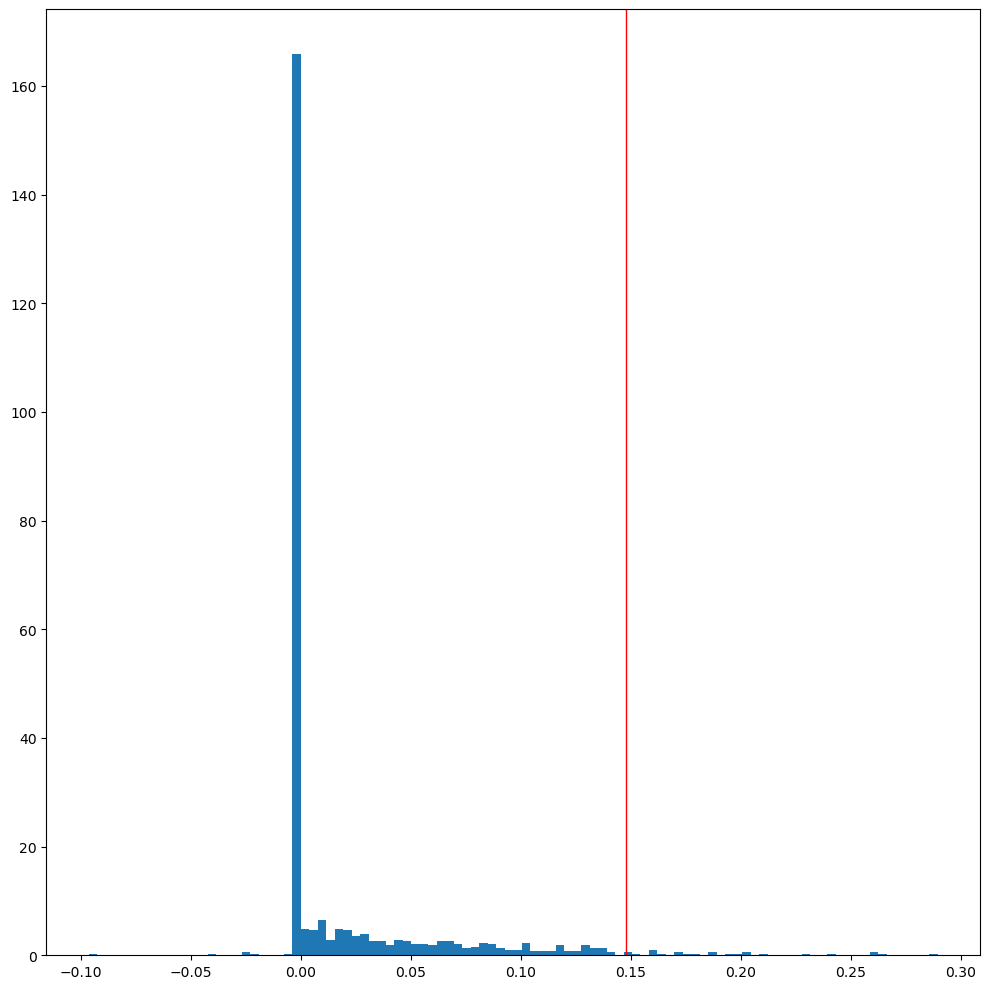

In [29]:
import matplotlib.pyplot as plt 

fig, axs = plt.subplots(1, 1, figsize=(10, 10), tight_layout=True)
x = roma.adata.uns['ROMA']['HALLMARK_COAGULATION'].null_median_exp
axs.hist(x, density=True, bins=100)
axs.axvline(roma.adata.uns['ROMA']['HALLMARK_COAGULATION'].test_median_exp, color='r', linewidth=1)

plt.show()

In [30]:
roma.adata.obs = sample_labels
roma.adata.obs

,sample_id,Type,CF_sample_id
1,GSM5356205,non_CF,non_CF 1
2,GSM5356206,non_CF,non_CF 2
3,GSM5356207,non_CF,non_CF 3
4,GSM5356208,non_CF,non_CF 4
5,GSM5356209,non_CF,non_CF 5
6,GSM5356210,non_CF,non_CF 6
7,GSM5356217,CF,CF 1
8,GSM5356218,CF,CF 2
9,GSM5356219,CF,CF 3
10,GSM5356220,CF,CF 4


In [ ]:
a

In [ ]:
# no orient pc 

In [ ]:
roma.unprocessed_genesets

['ALKBH2 mediated reversal of alkylation damage',
 'APC truncation mutants are not K63 polyubiquitinated',
 'ASP-3026-resistant ALK mutants',
 'Abnormal conversion of 2-oxoglutarate to 2-hydroxyglutarate',
 'Abasic sugar-phosphate removal via the single-nucleotide replacement pathway',
 'Acetylation',
 'Activation and oligomerization of BAK protein',
 'Activation of Na-permeable kainate receptors',
 'Activation, translocation and oligomerization of BAX',
 '5-Phosphoribose 1-diphosphate biosynthesis',
 'ABO blood group biosynthesis',
 'ARL13B-mediated ciliary trafficking of INPP5E',
 'Activated NTRK3 signals through PLCG1',
 'Activation of BIM and translocation to mitochondria',
 'Activation of BMF and translocation to mitochondria',
 'AKT-mediated inactivation of FOXO1A',
 'ALKBH3 mediated reversal of alkylation damage',
 'ATF6B (ATF6-beta) activates chaperones',
 'ATP sensitive Potassium channels',
 'Abacavir metabolism',
 'Activated NTRK2 signals through PLCG1',
 'Activation of AKT2'

In [ ]:
set(roma.adata.uns['ROMA'].keys()) & set(roma.unprocessed_genesets)


set()

In [ ]:
roma.adata.uns['ROMA']['ALKBH2 mediated reversal of alkylation damage']

KeyError: 'ALKBH2 mediated reversal of alkylation damage'

In [ ]:
len(roma.adata.uns['ROMA'])

16

In [ ]:
len(roma.adata.uns['ROMA']['Immune System'].subsetlist)

385

In [ ]:
for k, v in roma.adata.uns['ROMA'].items():
    print(len(v.subsetlist), len(v.outliers), end=' | ')
    print('null size', v.nullgenesetsize)

12 0 | null size 12
16 0 | null size 12
18 0 | null size 12
11 0 | null size 12
18 0 | null size 12
19 0 | null size 12
19 0 | null size 12
19 0 | null size 12
15 0 | null size 12
19 0 | null size 12
19 0 | null size 12
18 0 | null size 12
30 0 | null size 12
165 0 | null size 165
206 0 | null size 165
385 0 | null size 385


In [ ]:
roma

scROMA: module activities are computed

In [ ]:
roma.adata

AnnData object with n_obs × n_vars = 357 × 2500
    obs: 'celltype', 'n_genes'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'ROMA', 'ROMA_stats'

In [ ]:
df = roma.adata.uns['ROMA_stats']
df

,pvalue
AUF1 (hnRNP D0) binds and destabilizes mRNA,1.0
Activation of NF-kappaB in B cells,1.0
APC/C:Cdc20 mediated degradation of Securin,1.0
AURKA Activation by TPX2,1.0
APC/C:Cdh1 mediated degradation of Cdc20 and other APC/C:Cdh1 targeted proteins in late mitosis/early G1,1.0
APC:Cdc20 mediated degradation of cell cycle proteins prior to satisfation of the cell cycle checkpoint,1.0
APC/C:Cdc20 mediated degradation of mitotic proteins,1.0
Activation of APC/C and APC/C:Cdc20 mediated degradation of mitotic proteins,1.0
ABC transporter disorders,1.0
APC/C-mediated degradation of cell cycle proteins,1.0


In [ ]:
roma.adata.uns['ROMA']['Immune System'].subset.X

ArrayView([[ 0.        , -0.09370423, -0.00818664, ..., -0.07202104,
             0.        , -0.07216608],
           [ 0.        , -0.09370423, -0.00818664, ...,  1.1963146 ,
             0.        , -0.07216608],
           [ 0.        , -0.09370423, -0.00818664, ..., -0.07202104,
             0.        , -0.07216608],
           ...,
           [ 0.        , -0.09370423, -0.00818664, ..., -0.07202104,
             0.        , -0.07216608],
           [ 0.        , -0.09370423, -0.00818664, ..., -0.07202104,
             0.        , -0.07216608],
           [ 0.        , -0.09370423, -0.00818664, ..., -0.07202104,
             0.        , -0.07216608]], dtype=float32)

In [ ]:
roma.adata.uns['ROMA']['Immune System'].svd.components_.shape

(1, 385)

In [ ]:
svd = roma.adata.uns['ROMA']['Immune System'].svd
X = roma.adata.uns['ROMA']['Immune System'].X
pc1 = svd.components_[0]
print('components.shape', pc1.shape, 'X.shape', X.shape)

X_pca = X @ pc1
X_pca.shape

components.shape (385,) X.shape (357, 385)


(357,)

In [ ]:
adata.X.shape

(357, 2500)

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df = iris['data']
df.shape

(150, 4)

In [ ]:
from sklearn.decomposition import IncrementalPCA
svd = IncrementalPCA(n_components=2)
svd.fit(df.T)

svd.components_


array([[ 0.07714555,  0.07536535,  0.07094687,  0.07005971,  0.07506464,
         0.07846242,  0.06712527,  0.07600174,  0.06700216,  0.07693885,
         0.08194378,  0.07277702,  0.07528176,  0.06580841,  0.08711589,
         0.08147002,  0.07743585,  0.07548846,  0.08568179,  0.07472441,
         0.08347776,  0.07340754,  0.06707533,  0.07362466,  0.07354695,
         0.07761932,  0.0729442 ,  0.07914288,  0.07922647,  0.0717168 ,
         0.07379772,  0.07965029,  0.07875858,  0.08172666,  0.07528176,
         0.07591228,  0.08385165,  0.07498105,  0.06640529,  0.07774243,
         0.07349113,  0.0688705 ,  0.06572482,  0.06928978,  0.07409388,
         0.07196757,  0.07663814,  0.06946283,  0.0802031 ,  0.07608533,
         0.09982331,  0.08720883,  0.09727905,  0.07663574,  0.09056709,
         0.07969916,  0.08398411,  0.06902619,  0.09528173,  0.06813903,
         0.07264109,  0.07841595,  0.09065068,  0.08517786,  0.07530846,
         0.09417157,  0.07396383,  0.08572479,  0.0

In [ ]:
svd.components_.shape

(2, 150)

In [ ]:
svd.explained_variance_ratio_

array([0.85025771, 0.14746289])

In [ ]:
svd = IncrementalPCA(n_components=2)
svd.fit(df)

print(svd.components_.shape)
print(svd.explained_variance_ratio_)

(2, 4)
[0.92398758 0.05297912]


In [ ]:
df[df <= 0.9].dropna()

,0


In [ ]:
df[df <= 0.5].dropna()

,0


In [ ]:
roma.adata.uns['pyROMA']

{'Response to elevated platelet cytosolic Ca2+': GeneSetResult Response to elevated platelet cytosolic Ca2+,
 'Adaptive Immune System': GeneSetResult Adaptive Immune System,
 'Innate Immune System': GeneSetResult Innate Immune System,
 'Immune System': GeneSetResult Immune System}

In [ ]:
roma.adata.uns['pyROMA']['Immune System']

GeneSetResult Immune System

In [ ]:
roma.adata.uns['pyROMA']['Immune System']

GeneSetResult Immune System

In [ ]:
import pandas as pd

df_dict = {}
for k, v in roma.adata.uns['pyROMA'].items():
    df_dict[k] = v.p_value

pd.Series(df_dict).to_frame()

,0
Response to elevated platelet cytosolic Ca2+,0.606061
Adaptive Immune System,0.606061
Innate Immune System,1.000000
Immune System,0.606061


In [ ]:
roma.null_distributions

{30: [(0.2026695,
   0.13490455,
   0.12173574,
   0.14036767,
   0.17715885,
   0.23610955,
   0.13170254,
   0.17409201,
   0.22179629,
   0.14500819)],
 165: [(0.05426835,
   0.04783073,
   0.05403206,
   0.057529982,
   0.05179842,
   0.0574047,
   0.05688788,
   0.05325689,
   0.05689815,
   0.055830475)],
 385: [(0.032927223,
   0.041107308,
   0.03718031,
   0.037062436,
   0.029959802,
   0.032034807,
   0.033347208,
   0.02990949,
   0.028319394,
   0.03429491)]}

In [ ]:
roma.null_distributions[30][0]

(0.2026695,
 0.13490455,
 0.12173574,
 0.14036767,
 0.17715885,
 0.23610955,
 0.13170254,
 0.17409201,
 0.22179629,
 0.14500819)